# Predict IMDB Movie Rating
Purpose: Predict IMDB movie rating. This module includes the following functionality to pick up the best model
1. Exploratory Data Analysis 
2. Data Cleaning & data normalization
3. Feature Engineering
5. Split your dataset
6. Build model pipelines
7. Declare hyperparameters to tune
8. Fit and tune models with cross-validation
0. Evaluate metrics and select the winner
9. Save the best model as a project deliverable


## Input
data/movie_metadata.csv with 28 variables for 5043 movies, spanning across 100 years in 66 countries and 2399 unique director names.

- Target variable  : imdb_score
- Feature Variable : 28 features and all the features are numerical or non-numerical
- Dataset size: 5043 records

## Algorithms
Apply the following algorithms and pick up the winner

- Lasso
- Ridge
- ElasticNet
- RandomForestRegressor
- GradientBoostingRegressou

## Ahthor: Sophia Yue 
Creation date: 05/08/2019
## Import Libraries and Dataset

In [1]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso
# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

# Function for splitting training and test set
from sklearn import model_selection
from sklearn.model_selection import train_test_split 

from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.model_selection import  GridSearchCV

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/movie_metadata.csv')

## Exploratory Data Analysis & Data Clearning
- Considering inflation. it is not easy to convert all budgets into US dollarts.
- Only keep movie data for USA, bacause the “budget” variable was not all converted to US dollars


In [3]:
df.shape

(5043, 28)

In [4]:
df = df.drop_duplicates() 

In [5]:
df.shape

(4998, 28)

In [6]:
print(df.columns.values)

['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'plot_keywords' 'movie_imdb_link'
 'num_user_for_reviews' 'language' 'country' 'content_rating' 'budget'
 'title_year' 'actor_2_facebook_likes' 'imdb_score' 'aspect_ratio'
 'movie_facebook_likes']


In [7]:
df.drop("movie_imdb_link", axis = 1, inplace = True)

In [8]:
print(df.columns.values)

['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'plot_keywords' 'num_user_for_reviews' 'language'
 'country' 'content_rating' 'budget' 'title_year' 'actor_2_facebook_likes'
 'imdb_score' 'aspect_ratio' 'movie_facebook_likes']


In [9]:
df = df[df.country == 'USA' ]

In [10]:
df.shape

(3773, 27)

In [11]:
# Majority of language isare English, will drop the column "language".
df.language.value_counts()

English       3745
Spanish          7
Dari             1
Vietnamese       1
Cantonese        1
Hebrew           1
Japanese         1
Filipino         1
Aramaic          1
Maya             1
Hindi            1
Bosnian          1
None             1
Name: language, dtype: int64

In [12]:
df.drop("language", axis = 1, inplace = True)

In [13]:
numeric_features = df._get_numeric_data().columns.values.tolist()
text_features = df.columns.values.tolist()
text_features=[i for i in text_features if i not in numeric_features]
text_features

['color',
 'director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'country',
 'content_rating']

In [14]:
string_features=["movie_title", "plot_keywords"]
categorical_features=[i for i in text_features if i not in string_features]

numeric_features.remove("title_year") 
categorical_features.append("title_year")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000232E3EF9AC8>,
      dtype=object)

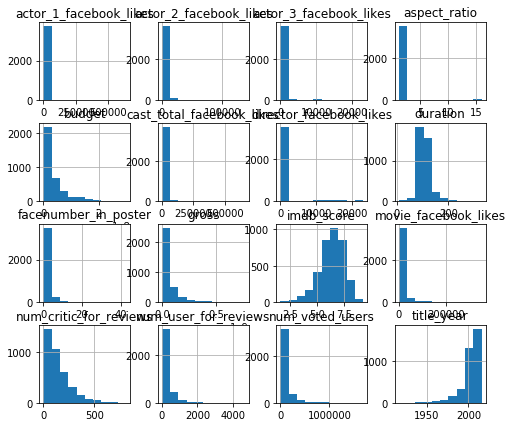

In [15]:
df.hist(figsize = (8,7))

In [16]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3735.000000,3767.000000,3700.00000,3760.000000,3769.000000,3.208000e+03,3.773000e+03,3773.000000,3761.000000,3760.000000,3.478000e+03,3700.000000,3766.000000,3773.000000,3553.000000,3773.000000
mean,143.208568,106.436422,825.89973,729.420479,7302.717962,5.500999e+07,9.096671e+04,10866.676915,1.418772,287.377128,3.564472e+07,2002.081892,1864.936006,6.367691,2.202502,7900.457726
std,123.206000,23.767542,3168.25653,1787.604224,16702.028047,7.112596e+07,1.470129e+05,19963.496949,2.108079,385.947294,4.252961e+07,12.839414,4386.850128,1.123776,1.369630,20090.410466
min,1.000000,7.000000,0.00000,0.000000,0.000000,7.030000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,52.000000,93.000000,8.00000,193.750000,708.000000,9.968114e+06,1.018200e+04,1805.000000,0.000000,74.000000,6.500000e+06,1998.000000,368.000000,5.700000,1.850000,0.000000
50%,113.000000,103.000000,52.00000,430.000000,1000.000000,3.212687e+07,3.977800e+04,3677.000000,1.000000,169.000000,2.000000e+07,2005.000000,658.000000,6.500000,1.850000,190.000000
75%,198.000000,117.000000,212.00000,681.000000,12000.000000,7.201925e+07,1.067550e+05,14959.000000,2.000000,345.000000,5.000000e+07,2011.000000,960.000000,7.100000,2.350000,5000.000000
max,813.000000,330.000000,23000.00000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,4667.000000,3.000000e+08,2016.000000,137000.000000,9.300000,16.000000,349000.000000


In [17]:
df.describe(include ='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,country,content_rating
count,3759,3700,3766,3773,3769,3773,3760,3682,3773,3615
unique,2,1812,2279,761,1568,3711,2672,3615,1,17
top,Color,Steven Spielberg,Morgan Freeman,Comedy,Robert De Niro,Home,Steve Coogan,based on novel,USA,R
freq,3611,24,16,185,42,3,7,4,3773,1558


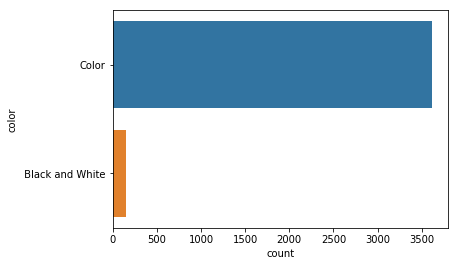

In [18]:
sns.countplot(y='color', data=df)


In [19]:
df.groupby("content_rating").count()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,facenumber_in_poster,plot_keywords,num_user_for_reviews,country,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
content_rating,,,,,,,,,,,,,,,,,,,,,
Approved,46,46,46,46,46,46,46,46,10,46,...,46,46,46,46,41,46,46,46,46,46
G,85,85,84,85,85,84,85,85,74,85,...,85,85,85,85,81,85,85,85,83,85
GP,4,4,4,4,4,4,4,4,0,4,...,4,4,4,4,3,4,4,4,3,4
M,3,3,3,3,3,3,3,3,1,3,...,3,3,3,3,3,3,3,3,3,3
NC-17,5,5,5,5,5,5,5,5,4,5,...,5,5,5,5,5,5,5,5,5,5
Not Rated,51,51,49,51,51,50,51,51,22,51,...,51,47,50,51,43,51,51,51,37,51
PG,554,555,555,555,555,554,555,555,497,555,...,552,544,555,555,524,555,555,555,533,555
PG-13,1191,1193,1184,1192,1193,1191,1192,1193,1147,1193,...,1187,1183,1192,1193,1139,1193,1192,1193,1158,1193
Passed,9,9,9,9,9,9,9,9,3,9,...,9,9,9,9,9,9,9,9,9,9


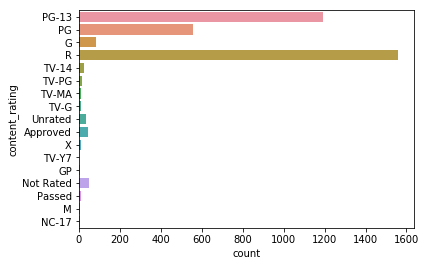

In [20]:
# There are opportunities to group "content_rating". I'll not pursue it in this exercise.
sns.countplot(y='content_rating', data=df)

### Numeric features : imputation and scaling

In [21]:
# Imputation
 
imp=Imputer(missing_values='NaN',strategy="most_frequent", axis=0)
df[numeric_features]=imp.fit_transform(df[numeric_features])
df[numeric_features].head()

C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204.0,4834.0,0.0,3054.0,237000000.0,936.0,7.9,1.78,33000.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220.0,48350.0,0.0,1238.0,300000000.0,5000.0,7.1,2.35,0.0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337.0,106759.0,0.0,2701.0,250000000.0,23000.0,8.5,2.35,164000.0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204.0,1873.0,1.0,738.0,263700000.0,632.0,6.6,2.35,24000.0
6,392.0,156.0,0.0,4000.0,24000.0,336530303.0,383056.0,46055.0,0.0,1902.0,258000000.0,11000.0,6.2,2.35,0.0


In [22]:
## Use standard scaler to keep as much variance as possible (compared to minmax)
scl=StandardScaler()
df[numeric_features]=scl.fit_transform(df[numeric_features])
df[numeric_features].head()  # before nomalization

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,4.710561,3.013731,-0.258011,0.069856,-0.377184,10.466394,5.410018,-0.302225,-0.671551,7.177487,4.935794,-0.211606,1.363717,-0.324293,1.249495
1,1.298542,2.634856,-0.078660,0.151117,1.959234,3.847142,2.586872,1.877842,-0.671551,2.467893,6.470779,0.715750,0.651737,0.104484,-0.393297
3,5.439971,2.424369,6.750378,12.480502,1.180428,5.882749,7.166103,4.804020,-0.671551,6.262021,5.252537,4.823130,1.897702,0.104484,7.770883
5,2.595271,1.077257,-0.106693,-0.112283,-0.398751,0.379121,0.824780,-0.450566,-0.196708,1.171199,5.586335,-0.280975,0.206749,0.104484,0.801461
6,2.027952,2.087591,-0.258011,1.832397,1.000704,4.245179,1.987090,1.762867,-0.671551,4.189903,5.447455,2.084876,-0.149241,0.104484,-0.393297



## Correlations between numeric features

In [23]:
correlations = df.corr()  # Calculate correlations between numeric features and create a correlations dataframe from df.

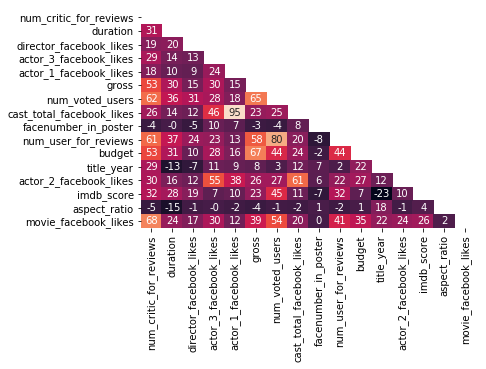

In [24]:
mask = np.zeros_like(correlations, dtype=np.bool) # Create a mask from correlations with all value = "False" 
# Create a mask from correlations with all value = "True" for element in the upper-triangle of arr (include diagonal and above the diagonal)  
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask, cbar = False)

## Feature Engineering
- The actors facebook likes are highly correlated with the total which is normal considering it's the sum of the others.
  - Remove it and make 2 categories : actor_1_facebook_likes and other_actors_facebook_likes.

- A big correlation between the num_voted users and the number of reviews from both critics and users, the gross and the movie_facebook_likes. 
   - Take the mean of those as a new variable called movie_success

In [25]:
rem_feature = ["cast_total_facebook_likes",
               'num_critic_for_reviews',
               "num_voted_users",
               "num_user_for_reviews",
               "gross","movie_facebook_likes",
               "actor_2_facebook_likes"
               "actor_3_facebook_likes"] 

df["movie_success"]=(df['num_critic_for_reviews'] + df["num_voted_users"]
                + df["num_user_for_reviews"] + df ["gross"] + df["movie_facebook_likes"])/6
df["other_actors_facebook_likes"] = df["actor_2_facebook_likes"] + df["actor_3_facebook_likes"]
num_features_2=[x for x in numeric_features if x not in rem_feature ]
num_features_2.extend(["movie_success", "other_actors_facebook_likes"])


## Correlations between numeric features after feature engineering

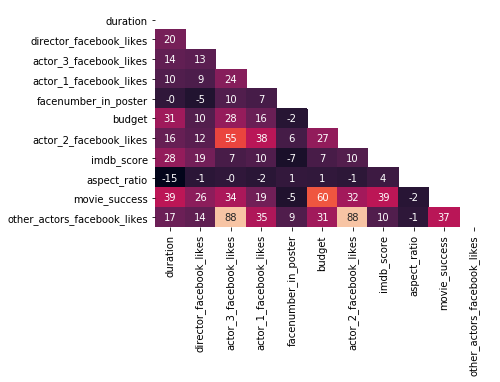

In [26]:
correlations = df[num_features_2].corr()
mask = np.zeros_like(correlations, dtype=np.bool) # Create a mask from correlations with all value = "False" 
# Create a mask from correlations with all value = "True" for element in the upper-triangle of arr (include diagonal and above the diagonal)  
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask, cbar = False)

## Save Analytical Base Table (ATB)

In [27]:
mov = df[num_features_2]
df.to_csv("mov_abt.csv", index = None)

## Model Training

### Split train/validation sets

In [28]:
# Create dataframe for target variable
y = mov.imdb_score

# Create dataframe for feature variables
X = mov.drop('imdb_score', axis = 1)
seed = 123
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y, test_size=0.2, random_state=seed)


## Create pipelines and hyperparameters


In [29]:
pipelines ={
    'lasso': make_pipeline(Lasso(random_state = 123)),
    'ridge': make_pipeline(Ridge(random_state = 123)),
    'enet ': make_pipeline(ElasticNet(random_state = 123)),
    'rf   ': make_pipeline(RandomForestRegressor(random_state = 123)),
    'gb   ': make_pipeline(GradientBoostingRegressor(random_state = 123))
}

# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

rf_hyperparameters = {'randomforestregressor__n_estimators': [100, 200],
                       'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]
                     }

gb_hyperparameters = {'gradientboostingregressor__n_estimators': [100, 200],
                      'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
                      'gradientboostingregressor__max_depth': [1, 3, 5]
                     }

hyperparameters = {
    'rf   ': rf_hyperparameters,
    'gb   ': gb_hyperparameters,
    'lasso': lasso_hyperparameters,
    'ridge': ridge_hyperparameters,
    'enet ': enet_hyperparameters
}


In [30]:
fitted_models = {}
for name , pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs = -1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    pred = model.predict(X_validation)
    r2_scr= r2_score(y_validation, pred)
    mae =  mean_absolute_error(y_validation, pred)
    print ( "Model: {}, best_score = {}, r2_score:{}, mean_absolute_error:{}".format(name, model.best_score_, r2_scr, mae))

Model: lasso, best_score = 0.22122449319400206, r2_score:0.21108563937882197, mean_absolute_error:0.67235511923428
Model: ridge, best_score = 0.22062222801116144, r2_score:0.20736379866035304, mean_absolute_error:0.6728960703648216
Model: enet , best_score = 0.22119065341044308, r2_score:0.21071240204821018, mean_absolute_error:0.6724115490996575
Model: rf   , best_score = 0.38327116950700085, r2_score:0.3571856303604859, mean_absolute_error:0.6102419352674538
Model: gb   , best_score = 0.3857032294955542, r2_score:0.37944740708934444, mean_absolute_error:0.5985185889056749


## Pick up the winner - GradientBoostingRegressor
- The GradientBoostingRegressor has the maximum best_score, maximum r2_score and minimum mean_absolute_error.
- Save the mofdel into disk

C:\Users\Laptop\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


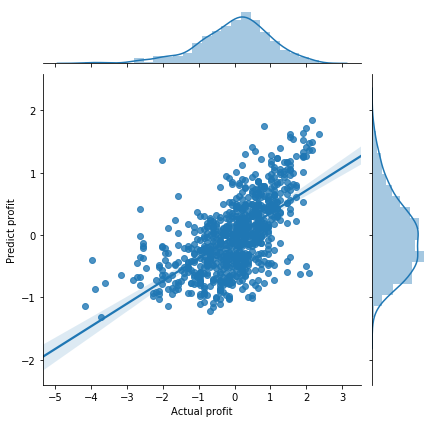

In [31]:
pred = fitted_models['gb   '].predict(X_validation)
sns.jointplot(y_validation, pred, kind = 'reg')
plt.xlabel('Actual profit')
plt.ylabel('Predict profit')
plt.show()

In [32]:
with open('final_pred_imdb_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['gb   '].best_estimator_, f)


## Convert the plot_keywords to numeric feature and add the features to the data frame.  

- Use CountVectorizer from  sklearn.feature_extraction.text to tokenize genres
- Use  tfidf_transformer performing TF-IDF transformations to weight and normalize words/terms  

Note: I'll not include the process in this exercise.